Datos de conexiones móviles a internet en Colombia (2014-2024):
    Año  Conexiones_Millones
0  2014                  8.6
1  2016                 23.7
2  2019                 35.0
3  2021                 38.0
4  2023                 47.4
5  2024                 48.0


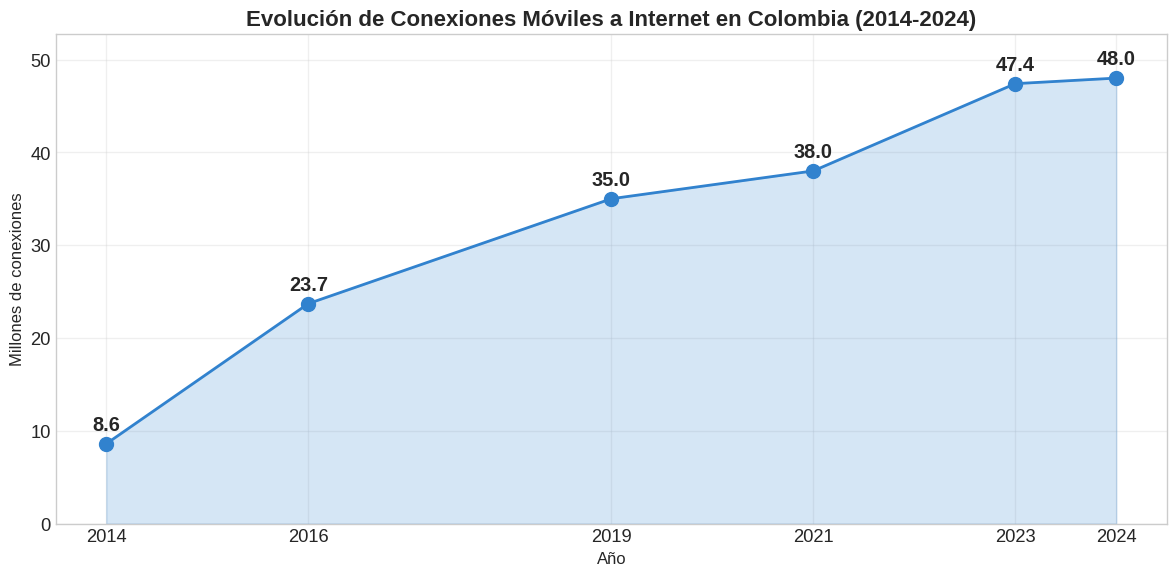

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Configuramos el estilo de las gráficas
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.family'] = 'sans-serif'

# Creamos un DataFrame con los datos proporcionados
data = {
    'Año': [2014, 2016, 2019, 2021, 2023, 2024],
    'Conexiones_Millones': [8.6, 23.7, 35.0, 38.0, 47.4, 48.0]
}

df = pd.DataFrame(data)

# Mostramos los datos base
print("Datos de conexiones móviles a internet en Colombia (2014-2024):")
print(df)

# 1. Visualización básica de los datos
plt.figure(figsize=(12, 6))
plt.plot(df['Año'], df['Conexiones_Millones'], marker='o', linestyle='-', linewidth=2, markersize=10, color='#3182CE')
plt.fill_between(df['Año'], df['Conexiones_Millones'], alpha=0.2, color='#3182CE')

# Añadimos etiquetas y título
plt.title('Evolución de Conexiones Móviles a Internet en Colombia (2014-2024)', fontsize=16, fontweight='bold')
plt.xlabel('Año', fontsize=12)
plt.ylabel('Millones de conexiones', fontsize=12)
plt.grid(True, alpha=0.3)

# Ajustamos los ejes
plt.xticks(df['Año'])
plt.ylim(0, max(df['Conexiones_Millones']) * 1.1)

# Añadimos los valores en cada punto
for x, y in zip(df['Año'], df['Conexiones_Millones']):
    plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()



In [4]:
# 2. Cálculo de tasas de crecimiento

# Calculamos las diferencias entre años y conexiones
df['Años_Diferencia'] = df['Año'].diff()
df['Crecimiento_Absoluto'] = df['Conexiones_Millones'].diff()

# Calculamos tasas de crecimiento
df['Tasa_Crecimiento_Anual_Absoluta'] = df['Crecimiento_Absoluto'] / df['Años_Diferencia']  # Millones por año
df['Tasa_Crecimiento_Porcentual'] = df['Crecimiento_Absoluto'] / df['Conexiones_Millones'].shift(1) * 100  # Porcentaje respecto al valor anterior
df['CAGR'] = ((df['Conexiones_Millones'] / df['Conexiones_Millones'].shift(1)) ** (1/df['Años_Diferencia']) - 1) * 100  # Tasa anual compuesta

# Mostramos resultados de crecimiento
print("\n--- ANÁLISIS DE TASAS DE CRECIMIENTO ---")
print("\nCrecimiento entre períodos:")
resultado = df[['Año', 'Conexiones_Millones', 'Años_Diferencia', 'Crecimiento_Absoluto',
                'Tasa_Crecimiento_Anual_Absoluta', 'Tasa_Crecimiento_Porcentual', 'CAGR']].copy()
resultado = resultado.dropna().reset_index(drop=True)  # Eliminamos primera fila (NaN) y reseteamos índice
print(resultado)

print("\nResumen de tasas de crecimiento por período:")
for i in range(len(resultado)):
    periodo_inicio = int(resultado.loc[i, 'Año'] - resultado.loc[i, 'Años_Diferencia'])
    periodo_fin = int(resultado.loc[i, 'Año'])

    crecimiento_abs = resultado.loc[i, 'Crecimiento_Absoluto']
    tasa_anual = resultado.loc[i, 'Tasa_Crecimiento_Anual_Absoluta']
    tasa_porcentual = resultado.loc[i, 'Tasa_Crecimiento_Porcentual']
    cagr = resultado.loc[i, 'CAGR']

    print(f"\nPeríodo {periodo_inicio}-{periodo_fin}:")
    print(f"  - Crecimiento absoluto: {crecimiento_abs:.1f} millones")
    print(f"  - Tasa de crecimiento anual: {tasa_anual:.2f} millones/año")
    print(f"  - Crecimiento porcentual total: {tasa_porcentual:.2f}%")
    print(f"  - Tasa de crecimiento anual compuesta (CAGR): {cagr:.2f}%")

# Calculamos la tasa de crecimiento para todo el período (2014-2024)
años_total = df['Año'].iloc[-1] - df['Año'].iloc[0]
crecimiento_total = df['Conexiones_Millones'].iloc[-1] - df['Conexiones_Millones'].iloc[0]
tasa_promedio_anual = crecimiento_total / años_total
cagr_total = ((df['Conexiones_Millones'].iloc[-1] / df['Conexiones_Millones'].iloc[0]) ** (1/años_total) - 1) * 100

print(f"\nCrecimiento total período 2014-2024:")
print(f"  - Crecimiento absoluto: {crecimiento_total:.1f} millones")
print(f"  - Tasa promedio de crecimiento anual: {tasa_promedio_anual:.2f} millones/año")
print(f"  - Tasa de crecimiento anual compuesta (CAGR): {cagr_total:.2f}%")
print(f"  - Crecimiento porcentual total: {(crecimiento_total/df['Conexiones_Millones'].iloc[0])*100:.2f}%")


--- ANÁLISIS DE TASAS DE CRECIMIENTO ---

Crecimiento entre períodos:
    Año  Conexiones_Millones  Años_Diferencia  Crecimiento_Absoluto  \
0  2016                 23.7              2.0                  15.1   
1  2019                 35.0              3.0                  11.3   
2  2021                 38.0              2.0                   3.0   
3  2023                 47.4              2.0                   9.4   
4  2024                 48.0              1.0                   0.6   

   Tasa_Crecimiento_Anual_Absoluta  Tasa_Crecimiento_Porcentual       CAGR  
0                         7.550000                   175.581395  66.006444  
1                         3.766667                    47.679325  13.878018  
2                         1.500000                     8.571429   4.197614  
3                         4.700000                    24.736842  11.685649  
4                         0.600000                     1.265823   1.265823  

Resumen de tasas de crecimiento por per

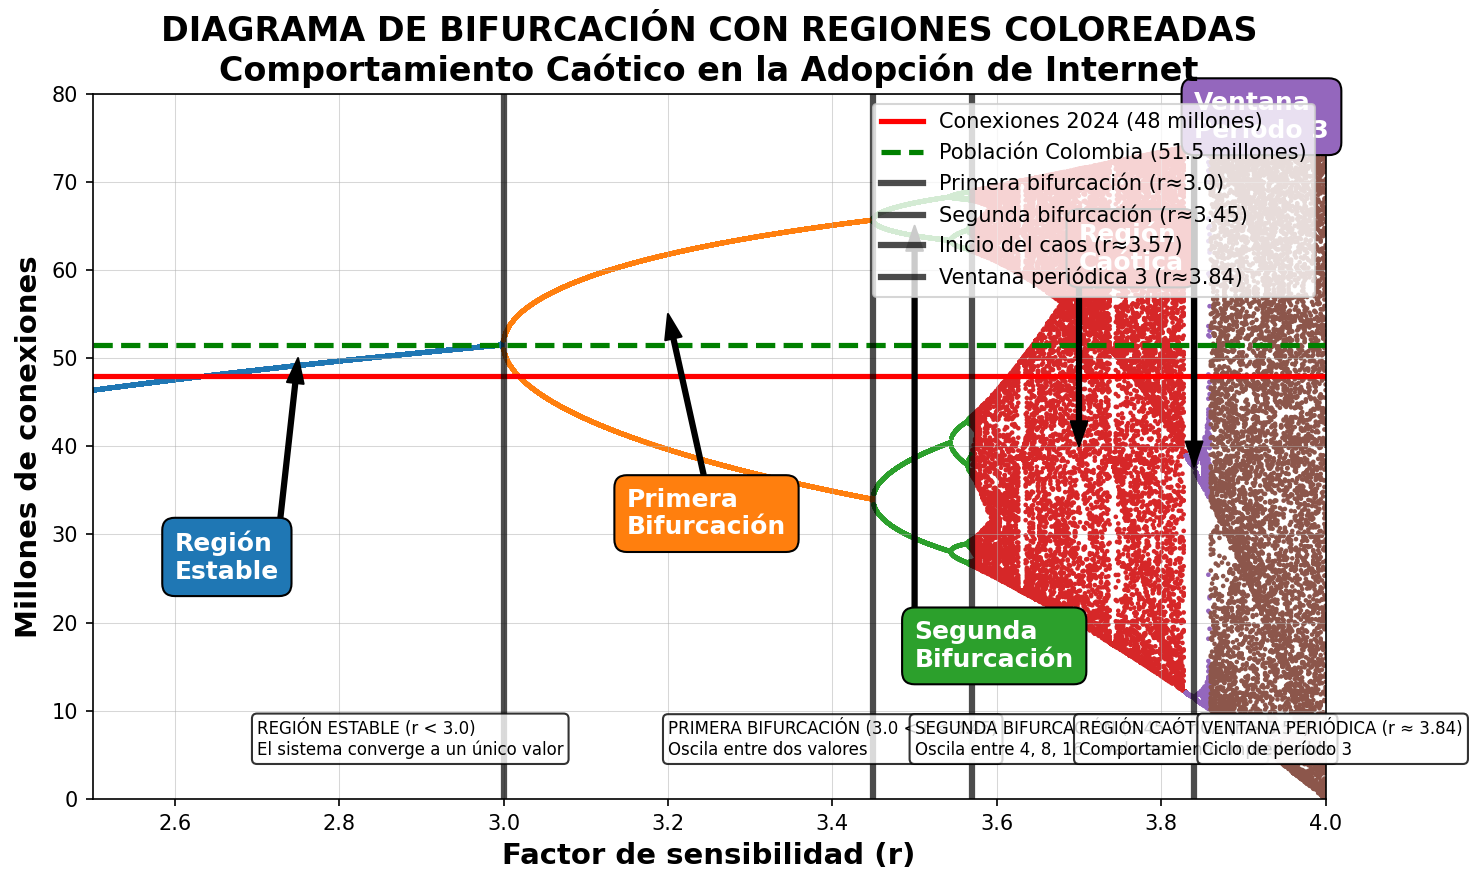

In [17]:
from matplotlib.colors import LinearSegmentedColormap

# Configuración para máxima visibilidad
plt.figure(figsize=(10, 6), dpi=150)
plt.style.use('default')

# FUNCIÓN LOGÍSTICA CLÁSICA (garantiza bifurcaciones)
def logistic_map(x, r):
    return r * x * (1 - x)

# Parámetros para el diagrama
r_min = 2.5
r_max = 4.0
n_r = 1000  # Más valores para mayor resolución
iterations = 1000  # Iteraciones totales
last_n = 100  # Puntos a mostrar después del transitorio

# Variables para almacenar resultados
bifurcation_r = []
bifurcation_x = []
bifurcation_colors = []  # Para colorear por región

# Calcular puntos del diagrama
for r in np.linspace(r_min, r_max, n_r):
    x = 0.4  # Valor inicial

    # Descartar transitorios
    for i in range(iterations - last_n):
        x = logistic_map(x, r)

    # Recopilar puntos para graficar
    for i in range(last_n):
        x = logistic_map(x, r)

        # Reescalar a millones de conexiones
        conexiones = x * 77.25

        bifurcation_r.append(r)
        bifurcation_x.append(conexiones)

        # Asignar colores según la región de bifurcación
        if r < 3.0:
            bifurcation_colors.append(0)  # Región estable
        elif r < 3.45:
            bifurcation_colors.append(1)  # Primera bifurcación
        elif r < 3.57:
            bifurcation_colors.append(2)  # Segunda bifurcación
        elif r < 3.83:
            bifurcation_colors.append(3)  # Región caótica
        elif r < 3.86:
            bifurcation_colors.append(4)  # Ventana periódica
        else:
            bifurcation_colors.append(5)  # Caos completo

# Crear mapa de colores personalizado para distinguir las regiones
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
cmap = LinearSegmentedColormap.from_list('bifurcation_regions', colors, N=6)

# Crear gráfico con colores vibrantes y puntos densos
plt.scatter(bifurcation_r, bifurcation_x,
           s=1.5,  # Puntos más grandes
           c=bifurcation_colors,  # Colorear por región
           cmap=cmap,  # Mapa de colores personalizado
           alpha=1.0,  # Sin transparencia
           marker='o')  # Usar círculos

# Añadir líneas de referencia
plt.axhline(y=48, color='red', linestyle='-', linewidth=2.5,
           label='Conexiones 2024 (48 millones)')
plt.axhline(y=51.5, color='green', linestyle='--', linewidth=2.5,
           label='Población Colombia (51.5 millones)')

# Añadir líneas verticales MÁS GRUESAS en puntos clave de bifurcación
plt.axvline(x=3.0, color='black', linestyle='-', linewidth=3.0, alpha=0.7,
           label='Primera bifurcación (r≈3.0)')
plt.axvline(x=3.45, color='black', linestyle='-', linewidth=3.0, alpha=0.7,
           label='Segunda bifurcación (r≈3.45)')
plt.axvline(x=3.57, color='black', linestyle='-', linewidth=3.0, alpha=0.7,
           label='Inicio del caos (r≈3.57)')
plt.axvline(x=3.84, color='black', linestyle='-', linewidth=3.0, alpha=0.7,
           label='Ventana periódica 3 (r≈3.84)')

# Añadir anotaciones con fondos de colores que coincidan con las regiones
def add_annotation(xy, text, xytext, color):
    plt.annotate(text, xy=xy, xytext=xytext,
                arrowprops=dict(facecolor='black', width=2, headwidth=8),
                fontsize=12, fontweight='bold', color='white',
                bbox=dict(facecolor=color, edgecolor='black', boxstyle='round,pad=0.5'))

add_annotation((2.75, 50), 'Región\nEstable', (2.6, 25), colors[0])
add_annotation((3.2, 55), 'Primera\nBifurcación', (3.15, 30), colors[1])
add_annotation((3.5, 65), 'Segunda\nBifurcación', (3.5, 15), colors[2])
add_annotation((3.7, 40), 'Región\nCaótica', (3.7, 60), colors[3])
add_annotation((3.84, 37.7), 'Ventana\nPeríodo 3', (3.84, 75), colors[4])

# Etiquetas y título
plt.title('DIAGRAMA DE BIFURCACIÓN CON REGIONES COLOREADAS\nComportamiento Caótico en la Adopción de Internet',
         fontsize=16, fontweight='bold')
plt.xlabel('Factor de sensibilidad (r)', fontsize=14, fontweight='bold')
plt.ylabel('Millones de conexiones', fontsize=14, fontweight='bold')

# Límites de ejes
plt.ylim(0, 80)
plt.xlim(r_min, r_max)

# Cuadrícula para mejor visualización
plt.grid(True, linestyle='-', linewidth=0.5, alpha=0.5)

# Leyenda
plt.legend(loc='upper right', fontsize=10)

# Añadir textos explicativos de las regiones
region_descriptions = [
    (2.7, 5, f"REGIÓN ESTABLE (r < 3.0)\nEl sistema converge a un único valor"),
    (3.2, 5, f"PRIMERA BIFURCACIÓN (3.0 < r < 3.45)\nOscila entre dos valores"),
    (3.5, 5, f"SEGUNDA BIFURCACIÓN (3.45 < r < 3.57)\nOscila entre 4, 8, 16... valores"),
    (3.7, 5, f"REGIÓN CAÓTICA (r > 3.57)\nComportamiento impredecible"),
    (3.85, 5, f"VENTANA PERIÓDICA (r ≈ 3.84)\nCiclo de período 3")
]

for x, y, text in region_descriptions:
    plt.text(x, y, text, fontsize=8, bbox=dict(facecolor='white', alpha=0.8, boxstyle='round'))

# Guardar con alta calidad
plt.tight_layout()
plt.savefig('bifurcacion_coloreada.png', dpi=300, bbox_inches='tight')
plt.show()

# Referenciass

* https://www.mintic.gov.co/portal/inicio/Sala-de-prensa/Noticias/399983:Colombia-supero-los-48-millones-de-accesos-a-Internet-movil-en-el-tercer-trimestre-del-2024
* https://www.mintic.gov.co/portal/inicio/Sala-de-prensa/Noticias/334348:Colombia-llego-a-47-4-millones-de-accesos-a-Internet-entre-fijos-y-moviles-4G-en-el-tercer-trimestre-de-2023
* https://www.crcom.gov.co/es/noticias/comunicado-prensa/en-2021-colombia-alcanzo-38-millones-accesos-internet-movil-y-84#:~:text=En%202021%2C%20Colombia%20alcanz%C3%B3%2038,4%20millones%20a%20Internet%20fijo
* https://branch.com.co/marketing-digital/estadisticas-de-la-situacion-digital-de-colombia-en-el-2019-y-2020/#:~:text=Resumen%20general%20del%20uso%20de,9%20horas%20y%2010%20minutos
* https://www.crcom.gov.co/es/noticias/estudio/internet-movil-servicio-tic-mayor-crecimiento-en-colombia#:~:text=Dicha%20tecnolog%C3%ADa%20registr%C3%B3%20un%20crecimiento%20superior%20al,de%20las%20personas%20hicieron%20uso%20de%20este.
